# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [ ]:

####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 나눔고딕 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'

## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [ ]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False  

NanumGothic


# **0. 지난 시간 복습**

## 0.1 데이터 수집

### 판다스 라이브러리 불러오기

**# import**

In [ ]:
# 판다스 라이브러리 불러오기

import pandas as pd

### 데이터 프레임 생성하기 : CVS 파일 읽어오기

**# pd.read_csv**

In [ ]:
# 깃허브에서 CSV 파일을 읽어 데이터프레임을 생성한다.

corona = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/Day2_corona_cases_local.csv?raw=true', 
                     encoding='euc-kr')
corona

,상태별,2020. 04. 01,2020. 04. 02,2020. 04. 03,2020. 04. 04,2020. 04. 05,2020. 04. 06,2020. 04. 07,2020. 04. 08,2020. 04. 09,2020. 04. 10,2020. 04. 11,2020. 04. 12,2020. 04. 13,2020. 04. 14,2020. 04. 15,2020. 04. 16,2020. 04. 17,2020. 04. 18,2020. 04. 19,2020. 04. 20,2020. 04. 21,2020. 04. 22,2020. 04. 23,2020. 04. 24,2020. 04. 25,2020. 04. 26,2020. 04. 27,2020. 04. 28,2020. 04. 29,2020. 04. 30,2020. 05. 01,2020. 05. 02,2020. 05. 03,2020. 05. 04,2020. 05. 05,2020. 05. 06,2020. 05. 07,2020. 05. 08,2020. 05. 09,...,2021. 02. 15,2021. 02. 16,2021. 02. 17,2021. 02. 18,2021. 02. 19,2021. 02. 20,2021. 02. 21,2021. 02. 22,2021. 02. 23,2021. 02. 24,2021. 02. 25,2021. 02. 26,2021. 02. 27,2021. 02. 28,2021. 03. 01,2021. 03. 02,2021. 03. 03,2021. 03. 04,2021. 03. 05,2021. 03. 06,2021. 03. 07,2021. 03. 08,2021. 03. 09,2021. 03. 10,2021. 03. 11,2021. 03. 12,2021. 03. 13,2021. 03. 14,2021. 03. 15,2021. 03. 16,2021. 03. 17,2021. 03. 18,2021. 03. 19,2021. 03. 20,2021. 03. 21,2021. 03. 22,2021. 03. 23,2021. 03. 24,2021. 03. 25,2021. 03. 26
0,해외유입,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5,12,24,16,12,11,11,14,9,5,7,5,6,4,2,4,9,7,12,5,4,8,6,10,8,3,2,3,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,10,22,17,25,18,23,17,14,17,11,19,18,21,21,16,23,12,18,17,18,22,12,19,19,15,17,11,23,15
1,국내발생,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,22,18,8,9,15,16,11,8,9,3,6,4,5,4,4,6,1,3,2,4,0,1,0,3,0,0,0,1,1,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382,405,334,338,319,426,401,381,404,399,335,427,452,444,467,474,436,370,345,452,427,441,440,437,396,331,411,419,471,490
2,신규,101.0,89.0,86.0,94.0,81.0,47.0,47.0,53.0,39,27,30,32,25,27,27,22,22,18,8,13,9,11,8,6,10,10,10,14,9,4,9,6,13,8,3,2,4,12,18,...,457.0,621.0,621.0,561.0,446.0,416.0,332.0,357.0,440.0,396.0,406,415,356,355,344,444,424,398,418,416,346,446,470,465,488,490,459,382,363,469,445,463,452,456,415,346,428,430,494,505


## 0.2 데이터 가공

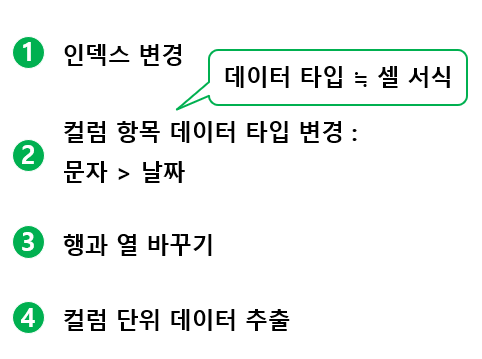

### 인덱스 변경

**# set_index('상태별')**

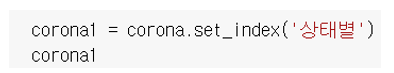

In [ ]:
# 상태별 항목을 인덱스로 지정한다.

corona1 = corona.set_index('상태별')
corona1

,2020. 04. 01,2020. 04. 02,2020. 04. 03,2020. 04. 04,2020. 04. 05,2020. 04. 06,2020. 04. 07,2020. 04. 08,2020. 04. 09,2020. 04. 10,2020. 04. 11,2020. 04. 12,2020. 04. 13,2020. 04. 14,2020. 04. 15,2020. 04. 16,2020. 04. 17,2020. 04. 18,2020. 04. 19,2020. 04. 20,2020. 04. 21,2020. 04. 22,2020. 04. 23,2020. 04. 24,2020. 04. 25,2020. 04. 26,2020. 04. 27,2020. 04. 28,2020. 04. 29,2020. 04. 30,2020. 05. 01,2020. 05. 02,2020. 05. 03,2020. 05. 04,2020. 05. 05,2020. 05. 06,2020. 05. 07,2020. 05. 08,2020. 05. 09,2020. 05. 10,...,2021. 02. 15,2021. 02. 16,2021. 02. 17,2021. 02. 18,2021. 02. 19,2021. 02. 20,2021. 02. 21,2021. 02. 22,2021. 02. 23,2021. 02. 24,2021. 02. 25,2021. 02. 26,2021. 02. 27,2021. 02. 28,2021. 03. 01,2021. 03. 02,2021. 03. 03,2021. 03. 04,2021. 03. 05,2021. 03. 06,2021. 03. 07,2021. 03. 08,2021. 03. 09,2021. 03. 10,2021. 03. 11,2021. 03. 12,2021. 03. 13,2021. 03. 14,2021. 03. 15,2021. 03. 16,2021. 03. 17,2021. 03. 18,2021. 03. 19,2021. 03. 20,2021. 03. 21,2021. 03. 22,2021. 03. 23,2021. 03. 24,2021. 03. 25,2021. 03. 26
상태별,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
해외유입,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5,12,24,16,12,11,11,14,9,5,7,5,6,4,2,4,9,7,12,5,4,8,6,10,8,3,2,3,11,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,10,22,17,25,18,23,17,14,17,11,19,18,21,21,16,23,12,18,17,18,22,12,19,19,15,17,11,23,15
국내발생,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,22,18,8,9,15,16,11,8,9,3,6,4,5,4,4,6,1,3,2,4,0,1,0,3,0,0,0,1,1,17,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382,405,334,338,319,426,401,381,404,399,335,427,452,444,467,474,436,370,345,452,427,441,440,437,396,331,411,419,471,490
신규,101.0,89.0,86.0,94.0,81.0,47.0,47.0,53.0,39,27,30,32,25,27,27,22,22,18,8,13,9,11,8,6,10,10,10,14,9,4,9,6,13,8,3,2,4,12,18,34,...,457.0,621.0,621.0,561.0,446.0,416.0,332.0,357.0,440.0,396.0,406,415,356,355,344,444,424,398,418,416,346,446,470,465,488,490,459,382,363,469,445,463,452,456,415,346,428,430,494,505


### 컬럼 항목 데이터 타입 변경

In [ ]:
# 컬럼 항목을 조회해 본다.

corona1.columns

Index(['2020. 04. 01', '2020. 04. 02', '2020. 04. 03', '2020. 04. 04',
       '2020. 04. 05', '2020. 04. 06', '2020. 04. 07', '2020. 04. 08',
       '2020. 04. 09', '2020. 04. 10',
       ...
       '2021. 03. 17', '2021. 03. 18', '2021. 03. 19', '2021. 03. 20',
       '2021. 03. 21', '2021. 03. 22', '2021. 03. 23', '2021. 03. 24',
       '2021. 03. 25', '2021. 03. 26'],
      dtype='object', length=360)

**# pd.to_datetime( )**

In [ ]:
# pd.to_datetime 명령어를 이용해 컬럼의 문자를 날짜형 자료형으로 변경한다. 

corona1.columns = pd.to_datetime(corona1.columns)
corona1.columns

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10',
               ...
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26'],
              dtype='datetime64[ns]', length=360, freq=None)

### 행과 열 바꾸기

**# corona1.T**

In [ ]:
# Transpose (T) 명령을 사용하여 행과 열을 바꾸어 놓는다.

corona2 = corona1.T
corona2

상태별,해외유입,국내발생,신규
2020-04-01,NaN,NaN,101.0
2020-04-02,NaN,NaN,89.0
2020-04-03,NaN,NaN,86.0
2020-04-04,NaN,NaN,94.0
2020-04-05,NaN,NaN,81.0
...,...,...,...
2021-03-22,15.0,331.0,346.0
2021-03-23,17.0,411.0,428.0
2021-03-24,11.0,419.0,430.0
2021-03-25,23.0,471.0,494.0


### 컬럼 단위 데이터 추출하기

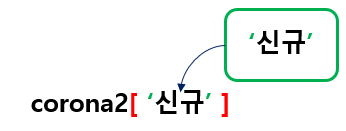

In [ ]:
# 컬럼 단위 데이터를 추출한다.

corona_new = corona2['신규']
corona_new

2020-04-01    101.0
2020-04-02     89.0
2020-04-03     86.0
2020-04-04     94.0
2020-04-05     81.0
              ...  
2021-03-22    346.0
2021-03-23    428.0
2021-03-24    430.0
2021-03-25    494.0
2021-03-26    505.0
Name: 신규, Length: 360, dtype: float64

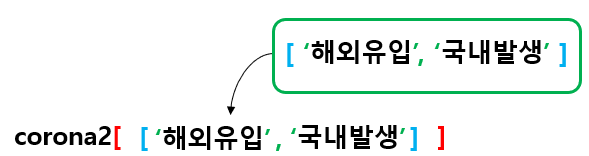

In [ ]:
# 두 개 이상의 열을 추출해 본다.

corona_cause = corona2[['해외유입', '국내발생']]
corona_cause

상태별,해외유입,국내발생
2020-04-01,NaN,NaN
2020-04-02,NaN,NaN
2020-04-03,NaN,NaN
2020-04-04,NaN,NaN
2020-04-05,NaN,NaN
...,...,...
2021-03-22,15.0,331.0
2021-03-23,17.0,411.0
2021-03-24,11.0,419.0
2021-03-25,23.0,471.0


# **1. 신규 확진자 분석**

## 1.1 데이터 수집

In [ ]:
# 지난 시간 복습 단계에서 열 단위로 데이터를 추출한 '신규' 확진자를 조회해본다.

corona_new

2020-04-01    101.0
2020-04-02     89.0
2020-04-03     86.0
2020-04-04     94.0
2020-04-05     81.0
              ...  
2021-03-22    346.0
2021-03-23    428.0
2021-03-24    430.0
2021-03-25    494.0
2021-03-26    505.0
Name: 신규, Length: 360, dtype: float64

## 1.2 데이터 가공

### 행 단위 데이터 추출하기

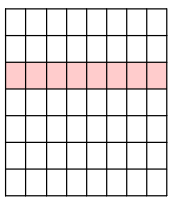

**# df.loc[  ]**

In [ ]:
# loc 명령을 사용하여 행 단위 데이터를 추출 조회해 본다.

corona_new.loc['2020-10-04']

64.0

In [ ]:
# loc 명령을 계속 연습한다.

corona_new.loc['2020-10-27']

88.0

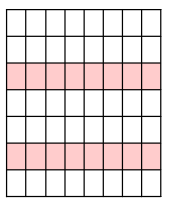

In [ ]:
# loc 명령을 사용해서 두 개 이상의 행을 추출해 본다.

corona_new.loc[ ['2020-10-27', '2020-10-28'] ]

2020-10-27     88.0
2020-10-28    103.0
Name: 신규, dtype: float64

### 슬라이싱

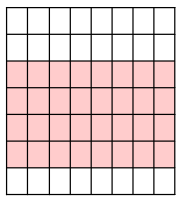

In [ ]:
# 슬라이싱 개념을 적용하여 데이터를 조회한다.

corona_new.loc['2020-08-01':'2020-08-05']

2020-08-01    31.0
2020-08-02    30.0
2020-08-03    23.0
2020-08-04    34.0
2020-08-05    33.0
Name: 신규, dtype: float64

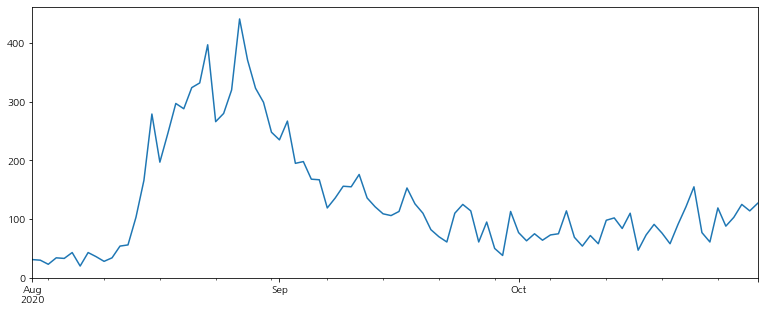

In [ ]:
# 1.2.2.2 슬라이싱해서 추출한 데이터로 그래프를 작성해 본다.

corona_new.loc['2020-08-01':'2020-10-31'].plot(figsize=(13,5));

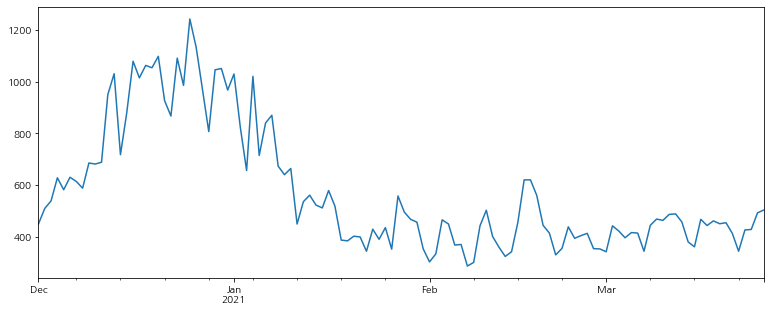

In [ ]:
corona_new.loc['2020-12-01':].plot(figsize=(13,5));

## 1.3 데이터 모델링 및 시각화

### 집계 - sum( ) 및 cumsum( )

In [ ]:
# 코로나 데이터를 조회한다.

corona_new

2020-04-01    101.0
2020-04-02     89.0
2020-04-03     86.0
2020-04-04     94.0
2020-04-05     81.0
              ...  
2021-03-22    346.0
2021-03-23    428.0
2021-03-24    430.0
2021-03-25    494.0
2021-03-26    505.0
Name: 신규, Length: 360, dtype: float64

In [ ]:
# 코로나 데이터를 합산한다.

corona_new.sum()

91291.0

In [ ]:
# 코로나 데이터를 누적 합산한다.

corona_new.cumsum()

2020-04-01      101.0
2020-04-02      190.0
2020-04-03      276.0
2020-04-04      370.0
2020-04-05      451.0
               ...   
2021-03-22    89434.0
2021-03-23    89862.0
2021-03-24    90292.0
2021-03-25    90786.0
2021-03-26    91291.0
Name: 신규, Length: 360, dtype: float64

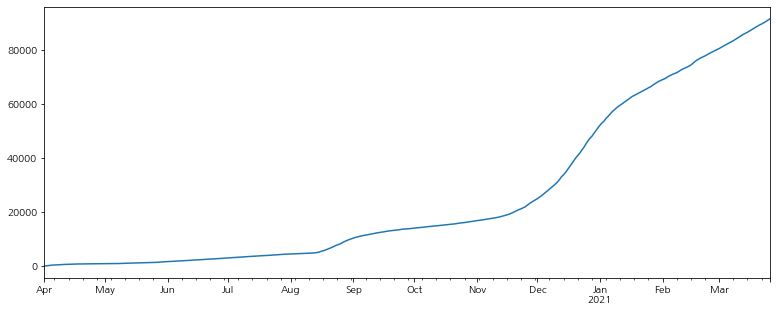

In [ ]:
# 누적 합산한 데이터를 그래프로 작성한다.

corona_new.cumsum().plot(figsize=(13, 5));

### 집계 - 피봇

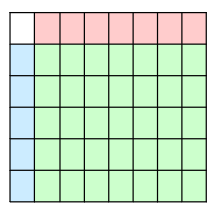

In [ ]:
# 1.3.4.1 피봇 수행 전에 신규 확진자 데이터를 조회해 본다.

corona_new

2020-04-01    101.0
2020-04-02     89.0
2020-04-03     86.0
2020-04-04     94.0
2020-04-05     81.0
              ...  
2021-03-22    346.0
2021-03-23    428.0
2021-03-24    430.0
2021-03-25    494.0
2021-03-26    505.0
Name: 신규, Length: 360, dtype: float64

In [ ]:
# 1.3.4.2 

type(corona_new)

pandas.core.series.Series

In [ ]:
# 1.3.4.3 피봇을 위해 열을 추가해야 하기 때문에 시리즈를 데이터프레임으로 우선 변환한다.

corona_new2 = corona_new.to_frame()
corona_new2.head()

,신규
2020-04-01,101.0
2020-04-02,89.0
2020-04-03,86.0
2020-04-04,94.0
2020-04-05,81.0


In [ ]:
corona_new2.index.year

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', length=360)

In [ ]:
corona_new2['연'] = corona_new2.index.year

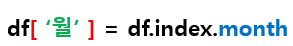

In [ ]:
# 1.3.4.4 인덱스의 월을 조회해 본다.

corona_new2.index.month

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', length=360)

In [ ]:
# 1.3.4.5 인덱스의 월을 새로운 열로 데이터프레임에 추가한다.

corona_new2['월'] = corona_new2.index.month

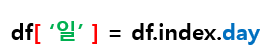

In [ ]:
# 1.3.4.6 인덱스의 일을 조회해 본다.

corona_new2.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
           dtype='int64', length=360)

In [ ]:
# 1.3.4.7 인덱스의 일을 새로운 열로 데이터프레임에 추가한다.

corona_new2['일'] = corona_new2.index.day

In [ ]:
# 1.3.4.8 새로 추가된 월과 일 열을 조회해 본다.

corona_new2.head()

,신규,연,월,일
2020-04-01,101.0,2020,4,1
2020-04-02,89.0,2020,4,2
2020-04-03,86.0,2020,4,3
2020-04-04,94.0,2020,4,4
2020-04-05,81.0,2020,4,5


In [ ]:
# 1.3.4.9 새로 추가된 '일'을 피봇의 인덱스로, '월'을 피봇의 컬럼으로, '신규 확진자 수'를 피봇의 값으로 지정한다.
# 결과를 새로운 변수에 저장한다.

corona_new3 = corona_new2.pivot(index='일', columns=['연', '월'], values='신규')
corona_new3.head()

연   2020                          ...                  2021              
월     4     5     6     7     8   ...     11     12      1      2      3 
일                                 ...                                    
1  101.0   9.0  35.0  51.0  31.0  ...  124.0  451.0  1029.0  305.0  344.0
2   89.0   6.0  38.0  54.0  30.0  ...   97.0  511.0   824.0  336.0  444.0
3   86.0  13.0  49.0  61.0  23.0  ...   75.0  540.0   657.0  467.0  424.0
4   94.0   8.0  39.0  63.0  34.0  ...  118.0  629.0  1020.0  451.0  398.0
5   81.0   3.0  39.0  61.0  33.0  ...  125.0  583.0   715.0  370.0  418.0

[5 rows x 12 columns]

In [ ]:
corona_new2.pivot(index=['연', '월'], columns=['일'], values='신규')

일            1      2      3       4   ...     28      29      30     31
연    월                                 ...                              
2020 4    101.0   89.0   86.0    94.0  ...   14.0     9.0     4.0    NaN
     5      9.0    6.0   13.0     8.0  ...   79.0    58.0    39.0   27.0
     6     35.0   38.0   49.0    39.0  ...   62.0    42.0    43.0    NaN
     7     51.0   54.0   61.0    63.0  ...   28.0    48.0    18.0   36.0
     8     31.0   30.0   23.0    34.0  ...  371.0   323.0   299.0  248.0
     9    235.0  267.0  195.0   198.0  ...   50.0    38.0   113.0    NaN
     10    77.0   63.0   75.0    64.0  ...  103.0   125.0   114.0  127.0
     11   124.0   97.0   75.0   118.0  ...  504.0   450.0   438.0    NaN
     12   451.0  511.0  540.0   629.0  ...  807.0  1045.0  1050.0  967.0
2021 1   1029.0  824.0  657.0  1020.0  ...  497.0   469.0   458.0  355.0
     2    305.0  336.0  467.0   451.0  ...  355.0     NaN     NaN    NaN
     3    344.0  444.0  424.0   398.0  ...    NaN     NaN     NaN    NaN

[12 rows x 31 columns]

In [ ]:
corona_new4 = corona_new2.pivot_table(index = ['연', '월'] ,values='신규', aggfunc= 'sum')
corona_new4

신규
연    월          
2020 4     979.0
     5     703.0
     6    1334.0
     7    1506.0
     8    5642.0
     9    3865.0
     10   2714.0
     11   7769.0
     12  26568.0
2021 1   17500.0
     2   11455.0
     3   11256.0

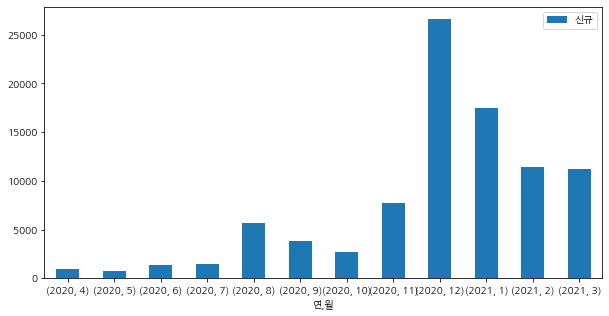

In [ ]:
corona_new4.plot(kind='bar', figsize=(10, 5), rot=0);

### 상자 그래프

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


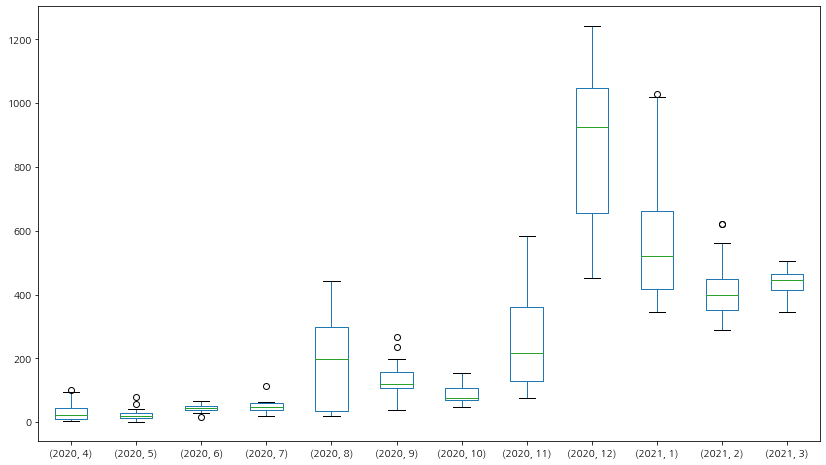

In [ ]:
# 1.3.5.1 새로 피봇 적용된 결과를 상자 그래프를 작성해 본다.

corona_new3.plot(kind='box', figsize=(14, 8));

# **2. 발생 경로별 확진자 분석**

## 2.1 데이터 수집

In [ ]:
# 2.1.1 발생경로별 확진자 데이터를 조회한다.

corona_cause

상태별,해외유입,국내발생
2020-04-01,NaN,NaN
2020-04-02,NaN,NaN
2020-04-03,NaN,NaN
2020-04-04,NaN,NaN
2020-04-05,NaN,NaN
...,...,...
2021-03-22,15.0,331.0
2021-03-23,17.0,411.0
2021-03-24,11.0,419.0
2021-03-25,23.0,471.0


## 2.2 데이터 가공

### 누락값 처리

In [ ]:
# 2.2.1 누락값을 제거하고 새 변수에 저장한다.

corona_cause2 = corona_cause.dropna()
corona_cause2

상태별,해외유입,국내발생
2020-04-09,23.0,16.0
2020-04-10,5.0,22.0
2020-04-11,12.0,18.0
2020-04-12,24.0,8.0
2020-04-13,16.0,9.0
...,...,...
2020-10-27,16.0,72.0
2020-10-28,7.0,96.0
2020-10-29,19.0,106.0
2020-10-30,21.0,93.0


### 선 그래프

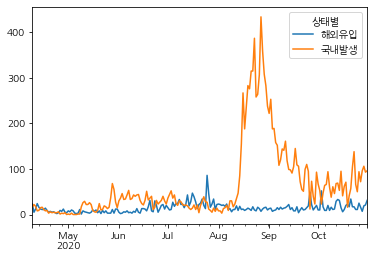

In [ ]:
# 2.2.2.1 발생경로별 꺾은선 그래프를 작성해 본다.

corona_cause2.plot();

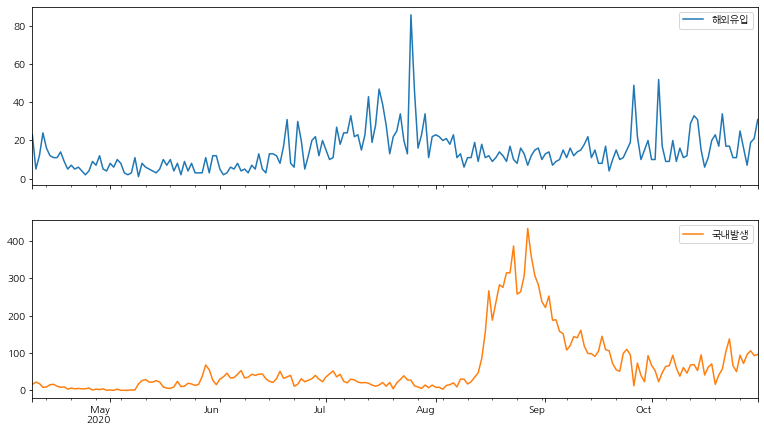

In [ ]:
# 2.2.2.2 서브플롯을 적용하여 그래프를 구분하여 작성해 본다.

corona_cause2.plot(figsize=(13, 8), subplots=True, rot=0);

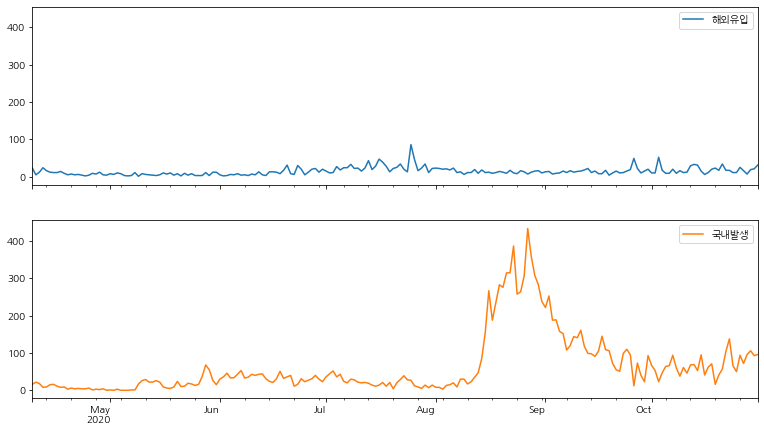

In [ ]:
# 2.2.2.3 sharey 를 적용하여 공통의 y축을 적용한다.

corona_cause2.plot(figsize=(13, 8), subplots=True, rot=0, sharey=True);

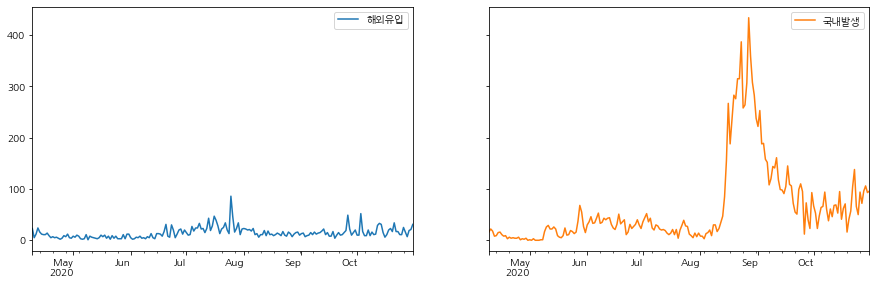

In [ ]:
# 2.2.2.4 layout을 적용하여 그래프를 구분하여 작성한다.

corona_cause2.plot(figsize=(15,5), subplots=True, rot=0, sharey=True, layout=(1, 2));

## 2.3 데이터 분석 및 시각화

### 집계 - sum( )

In [ ]:
# 2.3.1.1. 누락값을 제거한 발생경로별 데이터를 조회한다.

corona_cause2.head()

상태별,해외유입,국내발생
2020-04-09,23.0,16.0
2020-04-10,5.0,22.0
2020-04-11,12.0,18.0
2020-04-12,24.0,8.0
2020-04-13,16.0,9.0


In [ ]:
# 2.3.1.2 발생경로별 합계를 산출한다.

corona_cause2.sum()

상태별
해외유입     2967.0
국내발생    13143.0
dtype: float64

### 원 그래프

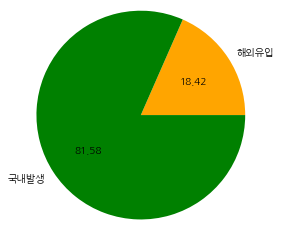

In [ ]:
# 2.3.2 발생경로별 합계를 원 그래프로 그려본다.

corona_cause2.sum().plot(kind='pie', radius=1.2, colors=['orange', 'green'], ylabel='', autopct='%.2f');

### 집계 - GroupBy

In [ ]:
# 2.3.3 발생경로별 월별 합계를 산출해서 새로운 변수에 저장한다.

corona_cause_month = corona_cause2.groupby(corona_cause2.index.month).sum()
corona_cause_month

상태별,해외유입,국내발생
4,207.0,174.0
5,192.0,511.0
6,323.0,1011.0
7,814.0,695.0
8,427.0,5215.0
9,435.0,3430.0
10,569.0,2107.0


### 막대 그래프

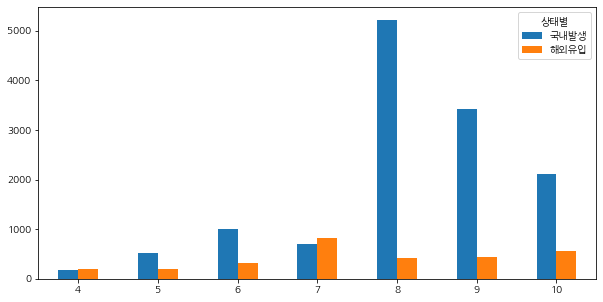

In [ ]:
# 2.3.4.1 발생경로별 월별 합계 데이터로 막대 그래프를 작성한다.

corona_cause_month.plot(kind='bar', figsize=(10, 5), rot=0, y=['국내발생', '해외유입']);

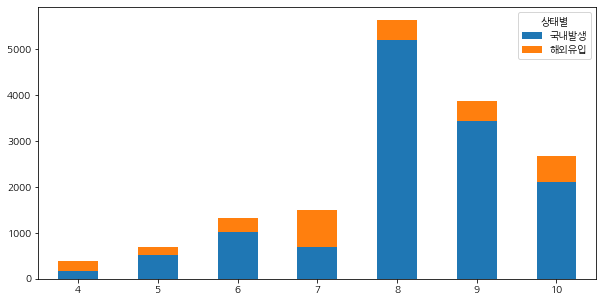

In [ ]:
# 2.3.4.2 발생경로별 월별 데이터로 누적 막대 그래프를 작성한다.

corona_cause_month.plot(kind='bar', figsize=(10, 5), rot=0, y=['국내발생', '해외유입'], stacked=True);

### 100% 누적 막대 그래프

발생경로별 확진자 데이터를 사용하여 100% 누적 막대 그래프를 작성해보겠습니다.

In [ ]:
# 2.3.5.1 발생경로별 월별 합계 데이터를 조회한다.

corona_cause_month

상태별,해외유입,국내발생
4,207.0,174.0
5,192.0,511.0
6,323.0,1011.0
7,814.0,695.0
8,427.0,5215.0
9,435.0,3430.0
10,569.0,2107.0


해외와 국내 발생 비중을 계산하고자 합니다.

우선 월별로 해외와 국내를 합한 확진자 수 데이터를 산출합니다.

In [ ]:
# 2.3.5.2 100% 누적 막대 그래프를 그리기 위한 중간 단계로 해외와 국내의 월별 합계 데이터를 합산한다.
# 합산 결과를 temp 변수에 임시 저장한다.

temp = corona_cause_month['해외유입'] + corona_cause_month['국내발생']
temp

4      381.0
5      703.0
6     1334.0
7     1509.0
8     5642.0
9     3865.0
10    2676.0
dtype: float64

해외 및 국내 발생 비중을 산출합니다.

예를 들어, 해외 유입 비중은 월별 해외 합계를 (월별 해외 + 월별 국내 합계)로 나누어줍니다.

In [ ]:
# 2.3.5.3 월별 해외 합계를 (월별 해외 + 국내 합계)로 나눈 비율을 구한다.
# '해외비율'이란 이름의 항목으로 열을 추가한다.

corona_cause_month['해외비율'] = corona_cause_month['해외유입'] / temp
corona_cause_month

상태별,해외유입,국내발생,해외비율
4,207.0,174.0,0.543307
5,192.0,511.0,0.273115
6,323.0,1011.0,0.242129
7,814.0,695.0,0.539430
8,427.0,5215.0,0.075682
9,435.0,3430.0,0.112549
10,569.0,2107.0,0.212631


같은 방식으로 국내 발생 비중을 월별로 산출합니다.

In [ ]:
# 2.3.5.4 월별 국내 합계를 (월별 해외 + 국내 합계)로 나눈 비율을 구한다.
# '국내비율'이란 이름의 항목으로 열을 추가한다.

corona_cause_month['국내비율'] = corona_cause_month['국내발생'] / temp
corona_cause_month

상태별,해외유입,국내발생,해외비율,국내비율
4,207.0,174.0,0.543307,0.456693
5,192.0,511.0,0.273115,0.726885
6,323.0,1011.0,0.242129,0.757871
7,814.0,695.0,0.539430,0.460570
8,427.0,5215.0,0.075682,0.924318
9,435.0,3430.0,0.112549,0.887451
10,569.0,2107.0,0.212631,0.787369


국내비율 및 해외비율 항목을 추출해서 100% 누적 막대 그래프를 작성합니다.

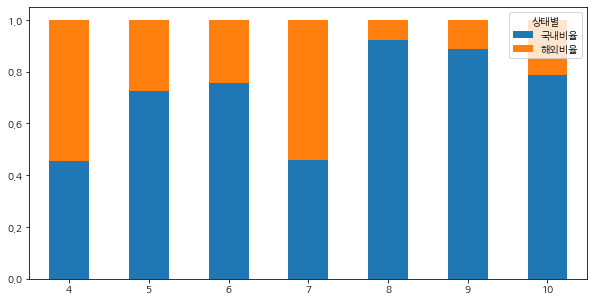

In [ ]:
# 2.3.5.5 국내비율과 해외비율 항목을 추출해서 100% 누적 막대 그래프를 작성한다.

corona_cause_month.plot(y=['국내비율', '해외비율'],
                   kind='bar',
                   stacked=True,
                   figsize=(10, 5),
                   rot=0);

# 3. 지역별 확진자 분석

## 3.1 데이터 수집

In [ ]:
# 3.1.1 지역별 확진자 데이터를 깃허브에서 수집한 후 데이터프레임을 생성한다.
# corona_local 이름의 변수에 저장한다.

corona_local = pd.read_csv('https://github.com/sagelab4data/HyundaiHigh_1/blob/main/Day3_corona_cases_SK_local.csv?raw=true', 
                     encoding='euc-kr')
corona_local.head()

,구분별,2020. 02. 04,2020. 02. 05,2020. 02. 06,2020. 02. 07,2020. 02. 08,2020. 02. 09,2020. 02. 10,2020. 02. 11,2020. 02. 12,2020. 02. 13,2020. 02. 14,2020. 02. 15,2020. 02. 16,2020. 02. 17,2020. 02. 18,2020. 02. 19,2020. 02. 20,2020. 02. 21,2020. 02. 22,2020. 02. 23,2020. 02. 24,2020. 02. 25,2020. 02. 26,2020. 02. 27,2020. 02. 28,2020. 02. 29,2020. 03. 01,2020. 03. 02,2020. 03. 03,2020. 03. 04,2020. 03. 05,2020. 03. 06,2020. 03. 07,2020. 03. 08,2020. 03. 09,2020. 03. 10,2020. 03. 11,2020. 03. 12,2020. 03. 13,...,2020. 09. 22,2020. 09. 23,2020. 09. 24,2020. 09. 25,2020. 09. 26,2020. 09. 27,2020. 09. 28,2020. 09. 29,2020. 09. 30,2020. 10. 01,2020. 10. 02,2020. 10. 03,2020. 10. 04,2020. 10. 05,2020. 10. 06,2020. 10. 07,2020. 10. 08,2020. 10. 09,2020. 10. 10,2020. 10. 11,2020. 10. 12,2020. 10. 13,2020. 10. 14,2020. 10. 15,2020. 10. 16,2020. 10. 17,2020. 10. 18,2020. 10. 19,2020. 10. 20,2020. 10. 21,2020. 10. 22,2020. 10. 23,2020. 10. 24,2020. 10. 25,2020. 10. 26,2020. 10. 27,2020. 10. 28,2020. 10. 29,2020. 10. 30,2020. 10. 31
0,서울,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,1,4,2,3,12,10,11,52,19,13,...,21,40,39,57,26,34,19,11,51,30,11,26,16,19,15,33,20,22,25,23,31,20,23,25,18,18,20,14,11,17,18,20,22,17,20,24,25,36,48,52
1,부산,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,3,-1,3,1,1,-1,0,2,1,1,...,5,7,7,3,2,3,1,3,5,6,18,8,5,5,3,2,5,5,3,3,4,1,2,55,0,6,4,15,2,10,5,0,0,1,0,1,0,0,0,2
2,대구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469,NaN,405,321,367,390,297,190,92,131,73,61,...,0,3,1,0,1,0,0,0,2,1,0,0,2,1,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,2,5,0,1,0,0,2,3,10,9
3,인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,0,0,0,0,0,4,12,0,2,...,2,5,10,3,1,9,1,0,4,3,4,7,6,5,4,6,5,0,8,1,3,0,8,11,4,2,1,5,3,6,4,5,2,0,3,2,10,5,3,3
4,광주,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,1,-1,0,0,2,0,0,0,0,...,0,2,0,2,0,2,0,0,3,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,1,0,2,0,1,0,6,0,0,0,0,0,2,0,0


## 3.2 데이터 가공

### 인덱스 변경

In [ ]:
# 3.2.1 인덱스를 '구분별' 항목으로 변경한다.

corona_local = corona_local.set_index('구분별')
corona_local.head()

,2020. 02. 04,2020. 02. 05,2020. 02. 06,2020. 02. 07,2020. 02. 08,2020. 02. 09,2020. 02. 10,2020. 02. 11,2020. 02. 12,2020. 02. 13,2020. 02. 14,2020. 02. 15,2020. 02. 16,2020. 02. 17,2020. 02. 18,2020. 02. 19,2020. 02. 20,2020. 02. 21,2020. 02. 22,2020. 02. 23,2020. 02. 24,2020. 02. 25,2020. 02. 26,2020. 02. 27,2020. 02. 28,2020. 02. 29,2020. 03. 01,2020. 03. 02,2020. 03. 03,2020. 03. 04,2020. 03. 05,2020. 03. 06,2020. 03. 07,2020. 03. 08,2020. 03. 09,2020. 03. 10,2020. 03. 11,2020. 03. 12,2020. 03. 13,2020. 03. 14,...,2020. 09. 22,2020. 09. 23,2020. 09. 24,2020. 09. 25,2020. 09. 26,2020. 09. 27,2020. 09. 28,2020. 09. 29,2020. 09. 30,2020. 10. 01,2020. 10. 02,2020. 10. 03,2020. 10. 04,2020. 10. 05,2020. 10. 06,2020. 10. 07,2020. 10. 08,2020. 10. 09,2020. 10. 10,2020. 10. 11,2020. 10. 12,2020. 10. 13,2020. 10. 14,2020. 10. 15,2020. 10. 16,2020. 10. 17,2020. 10. 18,2020. 10. 19,2020. 10. 20,2020. 10. 21,2020. 10. 22,2020. 10. 23,2020. 10. 24,2020. 10. 25,2020. 10. 26,2020. 10. 27,2020. 10. 28,2020. 10. 29,2020. 10. 30,2020. 10. 31
구분별,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,1,4,2,3,12,10,11,52,19,13,13,...,21,40,39,57,26,34,19,11,51,30,11,26,16,19,15,33,20,22,25,23,31,20,23,25,18,18,20,14,11,17,18,20,22,17,20,24,25,36,48,52
부산,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,3,-1,3,1,1,-1,0,2,1,1,3,...,5,7,7,3,2,3,1,3,5,6,18,8,5,5,3,2,5,5,3,3,4,1,2,55,0,6,4,15,2,10,5,0,0,1,0,1,0,0,0,2
대구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469,NaN,405,321,367,390,297,190,92,131,73,61,62,...,0,3,1,0,1,0,0,0,2,1,0,0,2,1,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,2,5,0,1,0,0,2,3,10,9
인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,0,0,0,0,0,4,12,0,2,1,...,2,5,10,3,1,9,1,0,4,3,4,7,6,5,4,6,5,0,8,1,3,0,8,11,4,2,1,5,3,6,4,5,2,0,3,2,10,5,3,3
광주,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,1,-1,0,0,2,0,0,0,0,0,...,0,2,0,2,0,2,0,0,3,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,1,0,2,0,1,0,6,0,0,0,0,0,2,0,0


### 컬럼 자료형 변경

In [ ]:
# 3.2.2 컬럼을 문자에서 날짜 자료형으로 변경한다.

corona_local.columns = pd.to_datetime(corona_local.columns)
corona_local.columns

DatetimeIndex(['2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', length=271, freq=None)

### 행과 열 바꾸기

In [ ]:
# 3.2.3 행과 열을 바꾸어 준 후 새 변수에 저장한다.

corona_local2 = corona_local.T
corona_local2

구분별,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,24.0,1.0,0.0,2.0,0.0,5.0,0.0,0.0,35.0,6.0,1.0,1.0,0.0,3.0,0.0,5.0,0.0
2020-10-28,25.0,0.0,2.0,10.0,0.0,7.0,0.0,0.0,31.0,14.0,0.0,1.0,3.0,0.0,5.0,3.0,0.0
2020-10-29,36.0,0.0,3.0,5.0,2.0,0.0,2.0,0.0,58.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2020-10-30,48.0,0.0,10.0,3.0,0.0,0.0,2.0,0.0,32.0,6.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0


### 누락값 처리

In [ ]:
# 3.2.4 누락값을 제거한 후 새 변수에 저장한다.

corona_local3 = corona_local2.dropna()
corona_local3

구분별,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2020-03-02,10.0,3.0,469.0,0.0,0.0,0.0,3.0,0.0,7.0,8.0,1.0,13.0,1.0,0.0,67.0,4.0,0.0
2020-03-04,1.0,3.0,405.0,2.0,2.0,1.0,3.0,0.0,7.0,1.0,0.0,1.0,0.0,0.0,89.0,1.0,0.0
2020-03-05,4.0,-1.0,321.0,0.0,1.0,1.0,0.0,0.0,9.0,2.0,1.0,4.0,0.0,-1.0,87.0,9.0,1.0
2020-03-06,2.0,3.0,367.0,0.0,-1.0,2.0,0.0,0.0,10.0,2.0,3.0,4.0,0.0,0.0,123.0,3.0,0.0
2020-03-07,3.0,1.0,390.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0,5.0,2.0,0.0,0.0,65.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,24.0,1.0,0.0,2.0,0.0,5.0,0.0,0.0,35.0,6.0,1.0,1.0,0.0,3.0,0.0,5.0,0.0
2020-10-28,25.0,0.0,2.0,10.0,0.0,7.0,0.0,0.0,31.0,14.0,0.0,1.0,3.0,0.0,5.0,3.0,0.0
2020-10-29,36.0,0.0,3.0,5.0,2.0,0.0,2.0,0.0,58.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2020-10-30,48.0,0.0,10.0,3.0,0.0,0.0,2.0,0.0,32.0,6.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0


## 3.3 데이터 분석 및 시각화

### 집계 - sum( ) 및 sort_values( )

In [ ]:
# 3.3.1.1 지역별 합계를 구한 후에 새 변수에 저장한다.

corona_local4 = corona_local3.sum()
corona_local4

구분별
서울    5923.0
부산     505.0
대구    4044.0
인천    1040.0
광주     500.0
대전     429.0
울산     146.0
세종      81.0
경기    5315.0
강원     267.0
충북     180.0
충남     474.0
전북     160.0
전남     180.0
경북     970.0
경남     256.0
제주      56.0
dtype: float64

In [ ]:
# 3.3.1.2 지역별 합계를 다시 합산하면 전체와 동일하다.

corona_local4.sum()

20526.0

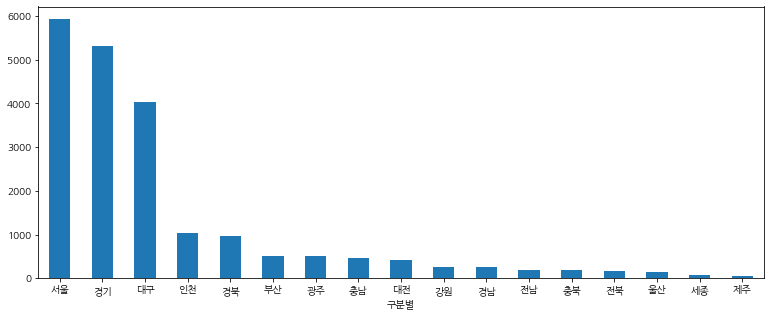

In [ ]:
# 3.3.1.3 지역별 합계를 정렬한 후에 막대 그래프를 작성한다.

corona_local4.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5), rot=0);

### 원 그래프

지역별 확진자 비중을 알 수 있는 원 그래프를 그려보기로 하겠습니다.

In [ ]:
# 3.3.2.1 지역별 확진자 데이터를 조회한다.

corona_local4

구분별
서울    5923.0
부산     505.0
대구    4044.0
인천    1040.0
광주     500.0
대전     429.0
울산     146.0
세종      81.0
경기    5315.0
강원     267.0
충북     180.0
충남     474.0
전북     160.0
전남     180.0
경북     970.0
경남     256.0
제주      56.0
dtype: float64

크기 순서로 정렬한 후 원 그래프를 작성해 보았습니다.

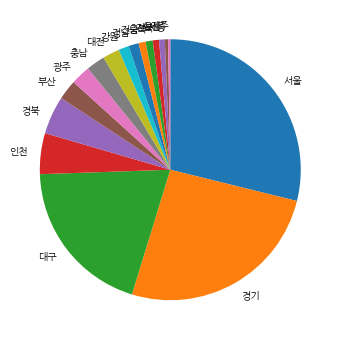

In [ ]:
# 3.3.2.2 지역별 확진자 비중을 알아보기 위해 원 그래프를 작성한다.

corona_local4.sort_values(ascending=False).plot(kind='pie', 
                                                figsize=(6, 6), 
                                                counterclock=False, 
                                                startangle=90, 
                                                ylabel='');

비중이 작은 지역의 데이터가 겹쳐보입니다. 상위 5개 지역을 제외하고 나머지를 기타로 합산하기로 하였습니다.

우선 확진자 수가 많은 상위 5개 지역을 알아보겠습니다.

In [ ]:
# 3.3.2.3 지역별 합계 기준으로 상위 5개 지역을 추출하여 large5라는 새 변수에 저장한다.

large5 = corona_local4.nlargest(5)
large5

구분별
서울    5923.0
경기    5315.0
대구    4044.0
인천    1040.0
경북     970.0
dtype: float64

확진자 수가 많은 5개 지역을 제외한 나머지 지역을 계산합니다.

3234명으로 조회되었습니다.

In [ ]:
# 3.3.2.4 전체에서 상위 5개 지역을 빼고난 후 기타 other라는 변수에 저장한다.

others = corona_local4.sum() - large5.sum()
others

3234.0

이 3234명을 '기타'라는 이름의 항목으로 생성합니다.

In [ ]:
# 3.3.2.5 others 변수를 이용하여 기타라는 이름의 시리즈를 생성하고 s_others라는 새 변수에 저장한다.

s_others = pd.Series(others, index=['기타'])
s_others

기타    3234.0
dtype: float64

원래의 상위 5 지역과 기타 지역을 하나로 연결하려고 합니다.

In [ ]:
# 3.3.2.6 생성된 s_others 시리즈를 기존의 large5에 append를 사용하여 추가한다.
# 행이 추가되며 이를 large6라는 새 변수에 저장한다.

large6 = large5.append(s_others)
large6

서울    5923.0
경기    5315.0
대구    4044.0
인천    1040.0
경북     970.0
기타    3234.0
dtype: float64

상위 5지역과 기타 지역을 합하여 원 그래프를 작성합니다.

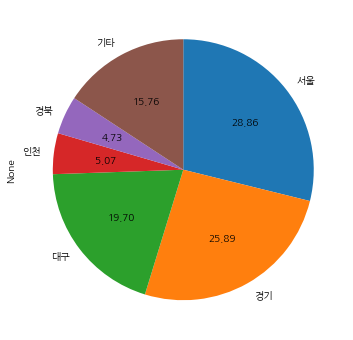

In [ ]:
# 3.3.2.7 상위 5개 지역 + 기타 항목이 추가된 large6 변수로 원 그래프를 작성한다.

large6.plot(kind='pie', figsize=(6, 6), counterclock=False, startangle=90, autopct='%.2f');

### 꺾은선 그래프

In [ ]:
# 3.3.3.1 지역별 일별 확진자 데이터를 조회합니다.

corona_local3.head()

구분별,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2020-03-02,10.0,3.0,469.0,0.0,0.0,0.0,3.0,0.0,7.0,8.0,1.0,13.0,1.0,0.0,67.0,4.0,0.0
2020-03-04,1.0,3.0,405.0,2.0,2.0,1.0,3.0,0.0,7.0,1.0,0.0,1.0,0.0,0.0,89.0,1.0,0.0
2020-03-05,4.0,-1.0,321.0,0.0,1.0,1.0,0.0,0.0,9.0,2.0,1.0,4.0,0.0,-1.0,87.0,9.0,1.0
2020-03-06,2.0,3.0,367.0,0.0,-1.0,2.0,0.0,0.0,10.0,2.0,3.0,4.0,0.0,0.0,123.0,3.0,0.0
2020-03-07,3.0,1.0,390.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0,5.0,2.0,0.0,0.0,65.0,5.0,0.0


In [ ]:
# 3.3.3.2 지역별 확진자 데이터를 조회합니다.

corona_local4

구분별
서울    5923.0
부산     505.0
대구    4044.0
인천    1040.0
광주     500.0
대전     429.0
울산     146.0
세종      81.0
경기    5315.0
강원     267.0
충북     180.0
충남     474.0
전북     160.0
전남     180.0
경북     970.0
경남     256.0
제주      56.0
dtype: float64

In [ ]:
# 3.3.3.3 지역별 기준으로 상위 5개 지역을 추출하여 large5라는 새 변수에 저장한다.

large5 = corona_local4.nlargest(5)
large5

구분별
서울    5923.0
경기    5315.0
대구    4044.0
인천    1040.0
경북     970.0
dtype: float64

In [ ]:
# 3.3.3.4 상위 5개 지역의 인덱스 항목을 조회한다.
large5.index

Index(['서울', '경기', '대구', '인천', '경북'], dtype='object', name='구분별')

In [ ]:
# 3.3.3.5 상위 5개 지역의 인덱스를 사용하여 해당 지역의 일별 데이터를 추출한다.
# 추출한 결과를 새 변수인 corona_local6에 저장한다.

corona_local6 = corona_local3[large5.index]
corona_local6

구분별,서울,경기,대구,인천,경북
2020-03-02,10.0,7.0,469.0,0.0,67.0
2020-03-04,1.0,7.0,405.0,2.0,89.0
2020-03-05,4.0,9.0,321.0,0.0,87.0
2020-03-06,2.0,10.0,367.0,0.0,123.0
2020-03-07,3.0,10.0,390.0,0.0,65.0
...,...,...,...,...,...
2020-10-27,24.0,35.0,0.0,2.0,0.0
2020-10-28,25.0,31.0,2.0,10.0,5.0
2020-10-29,36.0,58.0,3.0,5.0,1.0
2020-10-30,48.0,32.0,10.0,3.0,0.0


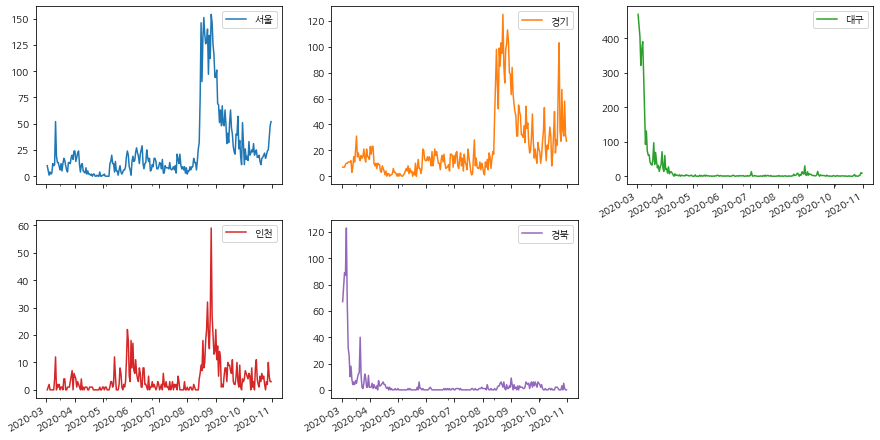

In [ ]:
# 3.3.3.6 상위 5개 지역의 데이터를 사용하여 꺾은선 그래프를 작성한다.

corona_local6.plot(figsize=(15, 8), subplots=True, layout=(2, 3), sharey=False);